<a href="https://colab.research.google.com/github/jamiewell/python_DataAnalysis/blob/master/python_ML/pima_indian_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install kaggle

In [0]:
#from google.colab import files
#files.upload()

In [0]:
#ls -1ha kaggle.json

In [0]:
#!mkdir -p ~/.kaggle

In [0]:
#!cp kaggle.json ~/.kaggle/

In [0]:
#!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#!kaggle datasets download -d uciml/pima-indians-diabetes-database

In [0]:
#!ls

In [0]:
#!unzip pima-indians-diabetes-database.zip

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Binarizer


In [0]:
diabetesData = pd.read_csv('diabetes.csv')

In [12]:
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
print(diabetesData['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [0]:
def getClfEval(y_test, pred=None, pred_proba=None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test,pred)
  # ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('Confusion Matrix')
  print(confusion)
  #ROC-AUC print 추가
  print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1-score: {3:.4f}, AUC: {4:.4f}'\
        .format(accuracy, precision, recall, f1, roc_auc))

In [0]:
def precisionRecallCurvePlot(y_test=None, pred_proba_c1=None):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  plt.figure(figsize=(8,6))
  threshold_boudary = thresholds.shape[0]
  plt.plot(thresholds, precisions[0:threshold_boudary], linestyle='--', label='precision')
  plt.plot(thresholds, recalls[0:threshold_boudary], label='recall')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1),2))

  plt.xlabel('Threshold value');
  plt.ylabel('Precision and Recall value')
  plt.legend();
  plt.grid();
  plt.show();

In [0]:
# Train & Prediction : LogisticRegression

In [18]:
X = diabetesData.iloc[:,:-1]
y = diabetesData.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

pred_proba = lr_clf.predict_proba(X_test)[:,-1]

getClfEval(y_test, pred, pred_proba)

Confusion Matrix
[[88 12]
 [23 31]]
Accuracy: 0.7727, Precision: 0.7209, Recall: 0.5741, F1-score: 0.6392, AUC: 0.7919


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
# Precision Recall chart

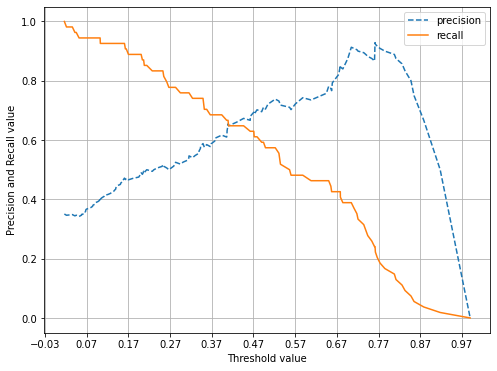

In [20]:
 pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
 precisionRecallCurvePlot(y_test, pred_proba_c1)

In [0]:
# Quartile Distribution

In [22]:
diabetesData.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

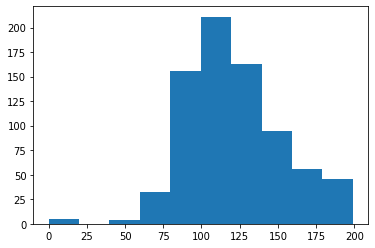

In [23]:
plt.hist(diabetesData['Glucose'],bins=10)

In [0]:
# Calculate count & percent from features with 0 value

In [25]:
zeroFeatures = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

totalCount = float(diabetesData.shape[0])

for feature in zeroFeatures:
  zeroCount = diabetesData[diabetesData[feature] == 0][feature].count()
  print('Feature : {0}\ value 0 counts {2:.2f} %'.format(feature, zeroCount, 100*(zeroCount / totalCount)  ) )   

Feature : Glucose\ value 0 counts 0.65 %
Feature : BloodPressure\ value 0 counts 4.56 %
Feature : SkinThickness\ value 0 counts 29.56 %
Feature : Insulin\ value 0 counts 48.70 %
Feature : BMI\ value 0 counts 1.43 %


In [0]:
# Replace 0 value with mean value

In [0]:
diabetesData[zeroFeatures]=diabetesData[zeroFeatures].replace(0, diabetesData[zeroFeatures].mean())

In [28]:
X = diabetesData.iloc[:,:-1]
Y = diabetesData.iloc[:,-1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
getClfEval(y_test, pred, pred_proba)


Confusion Matrix
[[90 10]
 [21 33]]
Accuracy: 0.7987, Precision: 0.7674, Recall: 0.6111, F1-score: 0.6804, AUC: 0.8433


In [0]:
#  Changing by classification threshold

In [0]:
def getEvalByThreslod(y_test, pred_proba_c1, thresholds):
  for customThreshold in thresholds:
    binarizer = Binarizer(threshold=customThreshold).fit(pred_proba_c1)
    customPredict = binarizer.transform(pred_proba_c1)
    print('Threshold: ',customThreshold)
    getClfEval(y_test, customPredict, pred_proba_c1)

In [33]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]

predProba = lr_clf.predict_proba(X_test)
 
getEvalByThreslod(y_test, predProba[:,1].reshape(-1,1), thresholds)

Threshold:  0.3
Confusion Matrix
[[67 33]
 [11 43]]
Accuracy: 0.7143, Precision: 0.5658, Recall: 0.7963, F1-score: 0.6615, AUC: 0.8433
Threshold:  0.33
Confusion Matrix
[[72 28]
 [12 42]]
Accuracy: 0.7403, Precision: 0.6000, Recall: 0.7778, F1-score: 0.6774, AUC: 0.8433
Threshold:  0.36
Confusion Matrix
[[76 24]
 [15 39]]
Accuracy: 0.7468, Precision: 0.6190, Recall: 0.7222, F1-score: 0.6667, AUC: 0.8433
Threshold:  0.39
Confusion Matrix
[[78 22]
 [16 38]]
Accuracy: 0.7532, Precision: 0.6333, Recall: 0.7037, F1-score: 0.6667, AUC: 0.8433
Threshold:  0.42
Confusion Matrix
[[84 16]
 [18 36]]
Accuracy: 0.7792, Precision: 0.6923, Recall: 0.6667, F1-score: 0.6792, AUC: 0.8433
Threshold:  0.45
Confusion Matrix
[[85 15]
 [18 36]]
Accuracy: 0.7857, Precision: 0.7059, Recall: 0.6667, F1-score: 0.6857, AUC: 0.8433
Threshold:  0.48
Confusion Matrix
[[88 12]
 [19 35]]
Accuracy: 0.7987, Precision: 0.7447, Recall: 0.6481, F1-score: 0.6931, AUC: 0.8433
Threshold:  0.5
Confusion Matrix
[[90 10]
 [21 33

In [34]:
binarizer = Binarizer(threshold=0.48)

predBinar = binarizer.fit_transform( predProba[:,1].reshape(-1,1) )

getClfEval(y_test, predBinar, predProba[:,1])

Confusion Matrix
[[88 12]
 [19 35]]
Accuracy: 0.7987, Precision: 0.7447, Recall: 0.6481, F1-score: 0.6931, AUC: 0.8433
